<a href="https://colab.research.google.com/github/Juci-Dev/challenge1-data-science/blob/main/AluraStore/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [56]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [57]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

faturamento = {}

for i in range(len(lojas)):
 faturamento[nomes_lojas[i]] = lojas[i]['Preço'].sum()

for nome_lojas, total in faturamento.items():
  print(f'{nome_lojas}: R$ {total:,.2f}')

print()



Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58



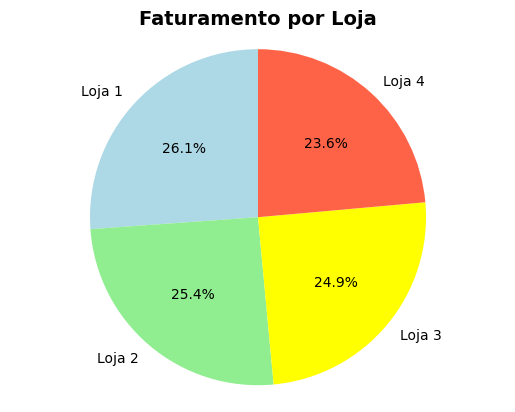

In [58]:

plt.pie(faturamento.values(), labels=faturamento.keys(), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'yellow', 'tomato'])

plt.title('Faturamento por Loja', fontsize=14, weight='bold')

plt.axis('equal')
plt.show()


# 2. Vendas por Categoria


In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (rest of your code to load data into loja, loja2, loja3, loja4) ...

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']  # Redefined nome_lojas as a list

vendas_categoria = [loja['Categoria do Produto'].value_counts() for loja in lojas]

# Use len(lojas) or len(nomes_lojas) here as they both have 4 elements
vendas_por_categoria = {nomes_lojas[i]: vendas_categoria[i] for i in range(len(lojas))}

tabela_vendas = pd.DataFrame(vendas_por_categoria).fillna(0).astype(int)

print('\nVendas por Categoria por Loja:\n')

for categoria in tabela_vendas.index:
    print(f'{categoria.capitalize()}:')
    for loja in tabela_vendas.columns:
        print(f'  {loja}: {tabela_vendas.loc[categoria, loja]}')
    print()


Vendas por Categoria por Loja:

Brinquedos:
  Loja 1: 324
  Loja 2: 313
  Loja 3: 315
  Loja 4: 338

Eletrodomesticos:
  Loja 1: 312
  Loja 2: 305
  Loja 3: 278
  Loja 4: 254

Eletronicos:
  Loja 1: 448
  Loja 2: 422
  Loja 3: 451
  Loja 4: 451

Esporte e lazer:
  Loja 1: 284
  Loja 2: 275
  Loja 3: 277
  Loja 4: 277

Instrumentos musicais:
  Loja 1: 182
  Loja 2: 224
  Loja 3: 177
  Loja 4: 170

Livros:
  Loja 1: 173
  Loja 2: 197
  Loja 3: 185
  Loja 4: 187

Moveis:
  Loja 1: 465
  Loja 2: 442
  Loja 3: 499
  Loja 4: 480

Utilidades domesticas:
  Loja 1: 171
  Loja 2: 181
  Loja 3: 177
  Loja 4: 201



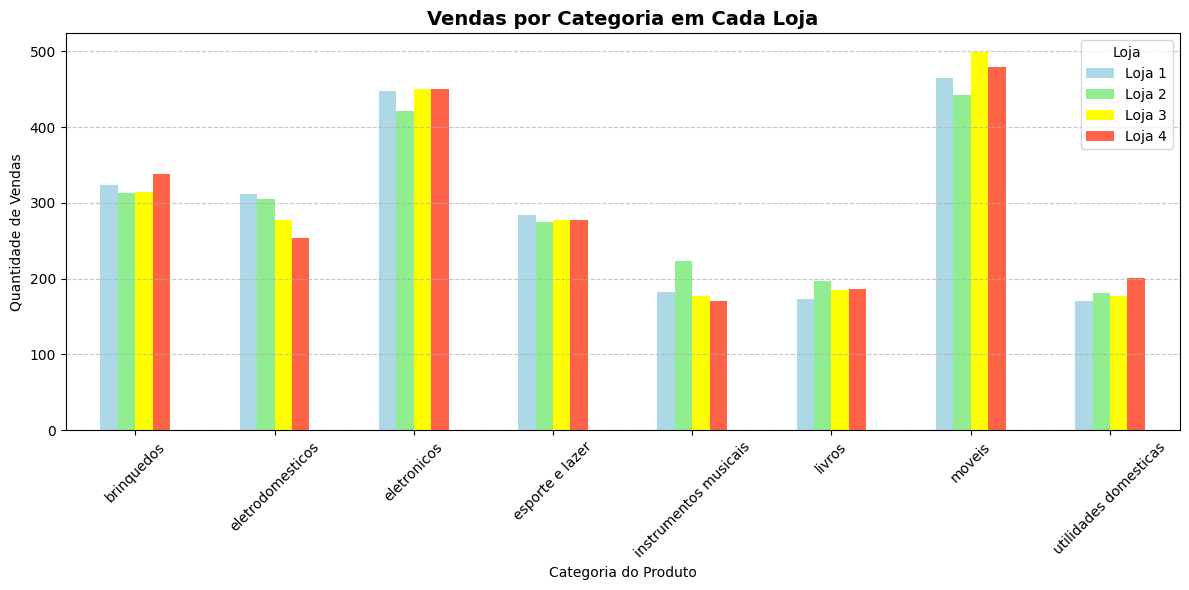

In [66]:
tabela_vendas.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'lightgreen', 'yellow', 'tomato'])

plt.title('Vendas por Categoria em Cada Loja', fontsize=14, weight='bold')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Média de Avaliação das Lojas

In [67]:
media_avaliacao = {}

for i in range(len(lojas)):
    media_avaliacao[nomes_lojas[i]] = lojas[i]['Avaliação da compra'].mean().item()

for nome_loja, total in media_avaliacao.items():
    print(f'{nome_loja}: {total:,.2f}')

print()


Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00



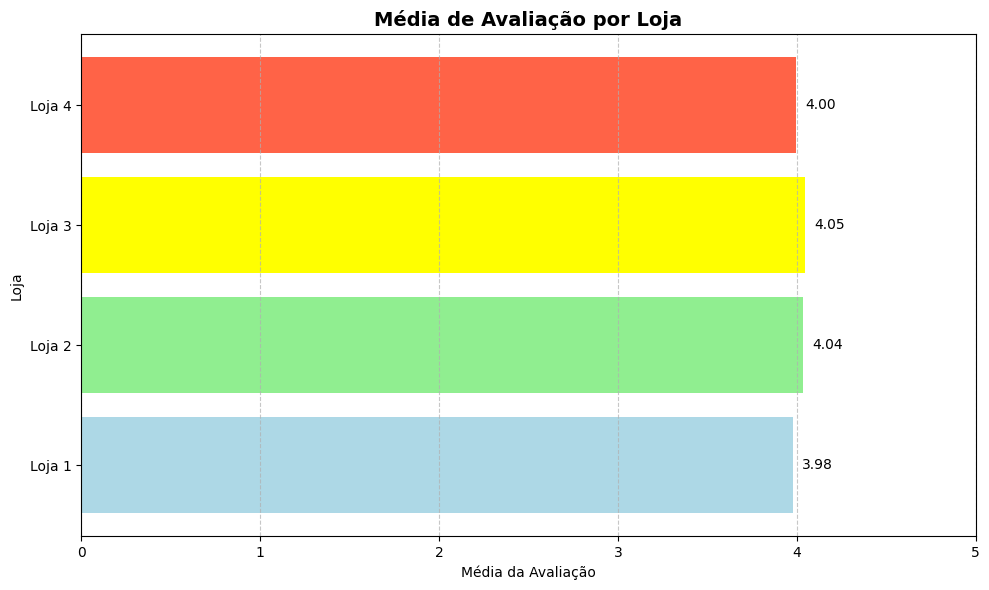

In [68]:
plt.figure(figsize=(10, 6))
cores = ['lightblue', 'lightgreen', 'yellow', 'tomato']

plt.barh(list(media_avaliacao.keys()), list(media_avaliacao.values()), color=cores)

plt.title('Média de Avaliação por Loja', fontsize=14, weight='bold')
plt.xlabel('Média da Avaliação')
plt.ylabel('Loja')
plt.xlim(0, 5)  # Avaliação vai de 0 a 5
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando os valores à direita das barras
for i, valor in enumerate(media_avaliacao.values()):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [69]:

vendas_produtos = [loja['Produto'].value_counts() for loja in lojas]


vendas_por_produtos = {nomes_lojas[i]: vendas_produtos[i] for i in range(len(nomes_lojas))}


resultado = ""

for nome_loja, produtos in vendas_por_produtos.items():
    produto_mais_vendido = produtos.index[0]
    produto_menos_vendido = produtos.index[-1]
    resultado += f'{nome_loja} - Produto mais vendido: {produto_mais_vendido}\n'
    resultado += ' ' * 9 + f'Produto menos vendido: {produto_menos_vendido}\n'
    resultado += '\n'

print(resultado)

Loja 1 - Produto mais vendido: Micro-ondas
         Produto menos vendido: Celular ABXY

Loja 2 - Produto mais vendido: Iniciando em programação
         Produto menos vendido: Jogo de tabuleiro

Loja 3 - Produto mais vendido: Kit banquetas
         Produto menos vendido: Blocos de montar

Loja 4 - Produto mais vendido: Cama box
         Produto menos vendido: Guitarra




# 5. Frete Médio por Loja


In [70]:

media_frete = {}

for i in range(len(lojas)):
    media_frete[nomes_lojas[i]] = lojas[i]['Frete'].mean().item()


print('Tabela de Frete Médio por Loja:\n')

for nome_loja, frete in media_frete.items():
    print(f'{nome_loja}: {frete:,.2f}')

print()

Tabela de Frete Médio por Loja:

Loja 1: 34.69
Loja 2: 33.62
Loja 3: 33.07
Loja 4: 31.28



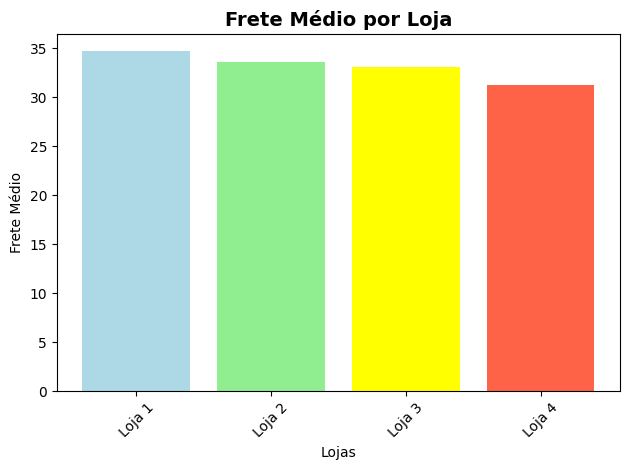

In [71]:
plt.bar(media_frete.keys(), media_frete.values(), color=['lightblue', 'lightgreen', 'yellow', 'tomato'])

plt.title('Frete Médio por Loja', fontsize=14, weight='bold')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                    # RELATÓRIO


FATURAMENTO: A Loja 4 apresentou o menor faturamento, tanto em valor absoluto quanto em participação percentual, representando apenas 23,6% do total. Esse dado reforça sua posição como a unidade com menor desempenho financeiro.

VENDAS POR CATEGORIA: A loja 4  apresentou vendas inferiores as demais em três categorias:

*   Eletrodomésticos
*   Instrumentos Musicais
*   Livros


Com o fraco desempenho a loja não tem mostrado competividades, dessa forma o compromete o total de  vendas da loja.

AVALIAÇÃO MÉDIA:  A Loja 3 obteve a melhor avaliação média, com 4,05 pontos, seguida pela Loja 2 (4,04).

A Loja 1 teve a pior média, com 3,98, ficando abaixo da nota 4,0.

A Loja 4, apesar de apresentar 4,00 pontos, ainda tem avaliação inferior às Lojas 2 e 3, reforçando a percepção de desempenho mediano em diversos aspectos.


PRODUTOS MAIS E MENOS VENDIDS: Pordutos em destaques de maior venda e menor saida em cada loja:

Loja 1: O produto mais vendido foi o micro-ondas, enquanto o menos vendido foi o celular ABXY.

Loja 2: O livro “Iniciando em programação” teve ótima saída, mas o jogo de tabuleiro não chamou tanta atenção.

Loja 3: O destaque foi o kit banquetas, porém os blocos de montar tiveram baixa procura.

Loja 4: A cama box teve um bom desempenho em vendas, mas a guitarra foi o produto menos vendido.

A loja 4  destaca  negativamente, pois embora tenha boa venda de móveis, como a cama box, seu menor desempenho foi com a guitarra.

FRETE :  Loja 4 apresenta o menor valor, com frete médio de R$31,28. Essas diferenças podem influenciar a decisão dos clientes na hora da compra, principalmente quando os preços dos produtos são parecidos.

CONCLUSÃO

Com base na análise, a Loja 4 apresentou o pior desempenho, com um faturamento de apenas 23,6% e vendas fracas em diversas categorias. Apesar de um frete mais baixo, a loja não demonstra competitividade suficiente para justificar sua manutenção. Diante disso, a venda da unidade é a alternativa mais estratégica, permitindo a realocação de recursos para lojas com melhor desempenho e maior potencial de crescimento.

